In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [58]:
data

,country,description,designation,points,price,province,region_1,title,variety,winery,continent,sentiment,anio,Antiguedad,ratio_puntos_precio
0,Italy,aroma include tropical fruit broom brimstone d...,Vulkà Bianco,87,28.0,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Europa,Positive,2013,11,3.107143
1,Portugal,ripe fruity wine smooth structured firm tannin...,Avidagos,87,15.0,Douro,Unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europa,Positive,2011,13,5.800000
3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,America del norte,Negative,2013,11,6.692308
4,US,like regular bottling come rough tannic rustic...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,America del norte,Positive,2012,12,1.338462
5,Spain,blackberry raspberry aroma typical navarran wh...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Europa,Positive,2011,13,5.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129964,France,initially quite muted wine slowly develops imp...,Domaine Saint-Rémy Herrenweg,90,28.0,Alsace,Alsace,Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Ehrhart,Europa,Positive,2013,11,3.214286
129965,France,rich beautiful dry wine offer considerable fre...,Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,Europa,Positive,2013,11,3.214286
129966,Germany,note honeysuckle cantaloupe sweeten deliciousl...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Europa,Positive,2013,11,3.214286
129968,France,welldrained gravel soil give wine crisp dry ch...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,Europa,Positive,2013,11,3.000000


In [2]:
df = pd.read_csv("vinos.csv").drop(['Unnamed: 0'], axis=1)
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


# Informacion basica

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [4]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [5]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

Elimino las filas sin pais, ya que al ser pocas no creo que tengan gran influencia en la totalidad de los datos. Teniendo en cuenta que el pais es un elemento principal en la produccion del vino

In [6]:
hipotetic_px = df.price.dropna()
hipotetic_px.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [7]:
np.percentile(hipotetic_px, 90)

np.float64(65.0)

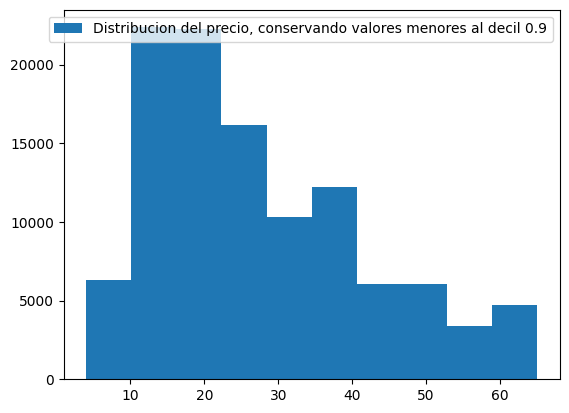

In [8]:
price_filter = df.loc[df.price <= 65]['price']
plt.hist(price_filter, label="Distribucion del precio, conservando valores menores al decil 0.9")
plt.legend()
plt.show()

In [9]:
def preprocess(df):
    df = df.copy()
    df_filter = df.dropna(subset=['country', 'designation'])
    imputer = SimpleImputer(strategy='median')
    df_filter.loc[:, 'price'] = imputer.fit_transform(df_filter[['price']])
    df_filter.drop_duplicates(inplace=True)
    df_filter = df_filter.drop(columns=['region_2', 'taster_name', 'taster_twitter_handle'])
    df_filter.loc[:, 'region_1'].fillna("Unknown", inplace=True)
    return df_filter

data = preprocess(df)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85394 entries, 0 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      85394 non-null  object 
 1   description  85394 non-null  object 
 2   designation  85394 non-null  object 
 3   points       85394 non-null  int64  
 4   price        85394 non-null  float64
 5   province     85394 non-null  object 
 6   region_1     85394 non-null  object 
 7   title        85394 non-null  object 
 8   variety      85394 non-null  object 
 9   winery       85394 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.2+ MB


C:\Users\Positivo BGH\AppData\Local\Temp\ipykernel_4672\177363059.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.drop_duplicates(inplace=True)
C:\Users\Positivo BGH\AppData\Local\Temp\ipykernel_4672\177363059.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filter.loc[:, 'region_1'].fillna("Unknown", inplace=True)


Paises y continentes

<Axes: xlabel='country'>

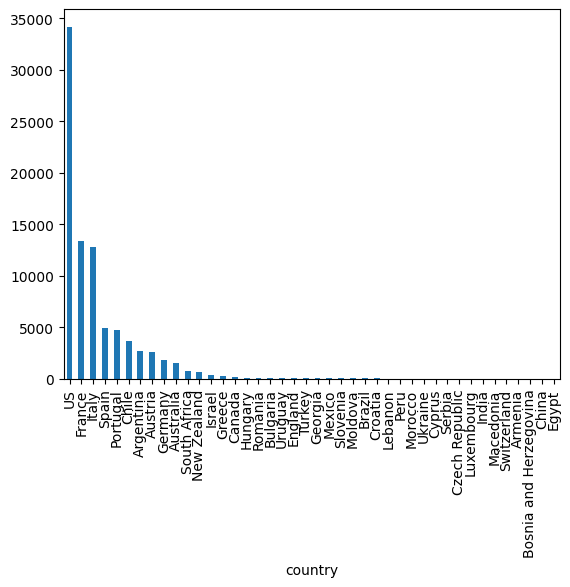

In [10]:
data['country'].value_counts().plot(kind='bar')

In [11]:
europe = ['Austria', 'Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','England', 'France','Germany','Greece','Italy','Luxembourg','Portugal','Hungary', 'Macedonia', 'Moldova', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Switzerland', 'Turkey', 'Ukraine', 'Georgia']
asia = ['Armenia', 'China','India','Israel','Lebanon' ]
northAmerica = ['Canada','US','Mexico']
sudAmerica = ['Argentina','Brazil','Chile','Peru','Uruguay'] 
oceania = ['Australia','New Zealand'] 
africa = ['South Africa','Morocco', 'Egypt']

#Chose to set as 'Other' all the continent with a small amout of reviews 
def continentDispacher(row):
    if row['country'] in europe:
        val = 'Europa'
    elif row['country'] in asia:
        val = 'Asia'
    elif row['country'] in northAmerica:
        val = 'America del norte'
    elif row['country'] in sudAmerica:
        val = 'America del sur'
    elif row['country'] in oceania:
        val = 'Oceania'
    elif row['country'] in africa:
        val = 'Africa'
    else:
        val = 'Other'

    return val

data['continent'] = data.apply(continentDispacher,1)
data.head(3)

,country,description,designation,points,price,province,region_1,title,variety,winery,continent
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,28.0,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Europa
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europa
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,America del norte


<Axes: ylabel='count'>

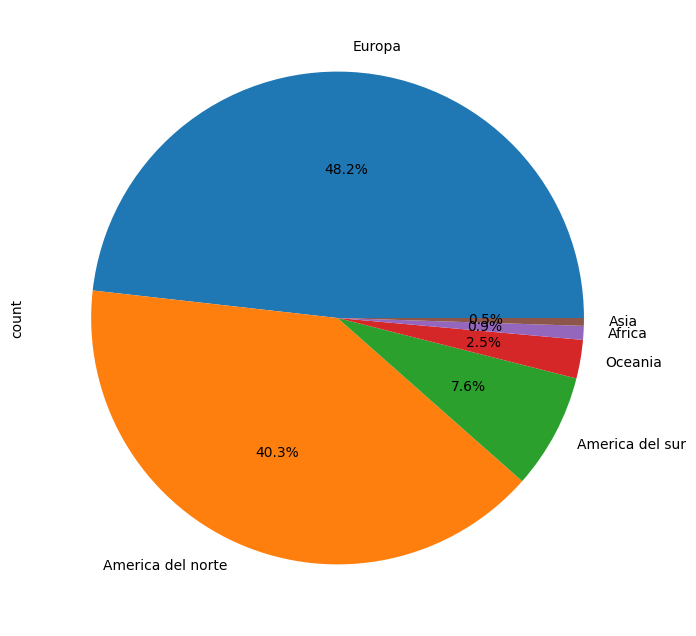

In [12]:
data.continent.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

Descripcion

In [13]:
import nltk
nltk.download('wordnet')

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to C:\Users\Positivo
[nltk_data]     BGH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocesamiento del Texto Antes de realizar cualquier análisis, es importante limpiar y preparar los datos textuales:
Eliminar caracteres especiales: Quitar puntuaciones, números y caracteres especiales que no aportan significado al análisis. Convertir a minúsculas: Para uniformizar el texto y evitar duplicidades causadas por diferencias de mayúsculas/minúsculas. Eliminar stopwords: Palabras comunes como "el", "la", "es", que no aportan mucho valor semántico. Lematización o stemming: Reducir las palabras a su forma raíz (por ejemplo, "corriendo" -> "correr").

In [14]:
def preprocess_text(text):
  lemmatizer = WordNetLemmatizer()

    # Convertir a minúsculas
  text = text.lower()
    # Eliminar caracteres especiales
  text = re.sub(r'[^a-z\s]', '', text)
    # Eliminar stopwords y lematizar
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in ENGLISH_STOP_WORDS])
  return text

data['description'] = data['description'].apply(preprocess_text)

Análisis de Frecuencia de Palabras Conteo de palabras: Identificar las palabras más comunes en las descripciones. Nubes de palabras: Crear visualizaciones para mostrar las palabras que aparecen con más frecuencia.

In [15]:
"""from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Crear un conteo de palabras
word_counts = Counter(" ".join(df_filter['description']).split())

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()"""

'from collections import Counter\nimport matplotlib.pyplot as plt\nfrom wordcloud import WordCloud\n\n# Crear un conteo de palabras\nword_counts = Counter(" ".join(df_filter[\'description\']).split())\n\n# Generar la nube de palabras\nwordcloud = WordCloud(width=800, height=400, background_color=\'white\').generate_from_frequencies(word_counts)\n\n# Mostrar la nube de palabras\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis(\'off\')\nplt.show()'

Que pais tiene la mayor cantidad de descripciones consideradas positvas?

In [16]:
"""from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convertir el texto en una matriz de palabras
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_matrix = vectorizer.fit_transform(df_filter['description'])

# Aplicar LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_matrix)"""

"from sklearn.decomposition import LatentDirichletAllocation\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# Convertir el texto en una matriz de palabras\nvectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')\ntext_matrix = vectorizer.fit_transform(df_filter['description'])\n\n# Aplicar LDA\nlda = LatentDirichletAllocation(n_components=5, random_state=42)\nlda.fit(text_matrix)"

In [17]:
"""for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])"""

"for index, topic in enumerate(lda.components_):\n    print(f'Topic #{index}:')\n    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])"

In [18]:
"""import joblib
joblib.dump(lda, 'lda_model.pkl')

lda_loaded = joblib.load('lda_model.pkl')
"""


"import joblib\njoblib.dump(lda, 'lda_model.pkl')\n\nlda_loaded = joblib.load('lda_model.pkl')\n"

Analisis de sentimiento partiendo de la descripcion, decidi guardarlo como varuiables categoricas en vez de numericas; sentiemientos Negativos, positivos o neutros. Luego para el modelo de ML lo voy a procesar coimo variables ordinales

In [19]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    score = analysis.sentiment.polarity
    if score < 0:
      return "Negative"
    elif score == 0:
      return "Neutral"
    else:
      return "Positive"

data['sentiment'] = data['description'].apply(analyze_sentiment)


In [20]:
data.head()

,country,description,designation,points,price,province,region_1,title,variety,winery,continent,sentiment
0,Italy,aroma include tropical fruit broom brimstone d...,Vulkà Bianco,87,28.0,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Europa,Positive
1,Portugal,ripe fruity wine smooth structured firm tannin...,Avidagos,87,15.0,Douro,Unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europa,Positive
3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,America del norte,Negative
4,US,like regular bottling come rough tannic rustic...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,America del norte,Positive
5,Spain,blackberry raspberry aroma typical navarran wh...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Europa,Positive


Designation

In [21]:
data.groupby('designation')['points'].mean().sort_values(ascending=False).head(15)

designation
Cerretalto                                         100.0
Cristal Vintage Brut                               100.0
Barca-Velha                                        100.0
Vargellas Vinhas Velhas Vintage                     99.0
Clos du Mesnil Brut Blanc de Blancs                 99.0
Barca Velha                                         99.0
Sorì Tildìn                                         99.0
Cà d'Morissio Riserva                               99.0
Nacional Vintage                                    99.0
Cuvée Constance 500ml                               99.0
Elevation 1147 Estate                               99.0
Sperss                                              98.0
Nello Riserva                                       98.0
Zwischen den Seen Nummer 9 Trockenbeerenauslese     98.0
The Relic                                           98.0
Name: points, dtype: float64

Province

In [22]:
count_prov = data.province.value_counts()
count_prov.describe()

count      406.000000
mean       210.330049
std       1225.703408
min          1.000000
25%          2.000000
50%          8.000000
75%         46.000000
max      22611.000000
Name: count, dtype: float64

In [23]:
def group_provinces(count_prov, threshold=8):
    # Crear un nuevo DataFrame con la provincia como índice y el conteo como valor
    df = pd.DataFrame(count_prov, columns=['count'])

    # Identificar provincias que tienen menos de 'threshold' apariciones
    df['province'] = df.index
    df['group'] = df['province'].apply(lambda x: 'others' if df.loc[x, 'count'] < threshold else x)

    # Agrupar por el nuevo nombre de grupo y sumar los conteos
    grouped_df = df.groupby('group').sum().reset_index()
    
    # Reemplazar el nombre del grupo 'others' en el índice del DataFrame original
    result_df = grouped_df[['group', 'count']].groupby('group').sum().reset_index()

    return result_df

subset_prov = group_provinces(count_prov)

In [24]:
subset_prov.set_index(subset_prov.group, inplace=True)
subset_prov.drop('group', axis = 1, inplace=True)
subset_prov

,count
group,
Aconcagua Costa,14
Aconcagua Valley,80
Aegean,18
Alentejano,757
Alentejo,160
...,...
Wiener Gemischter Satz,12
Württemberg,20
others,572


<Axes: ylabel='country'>

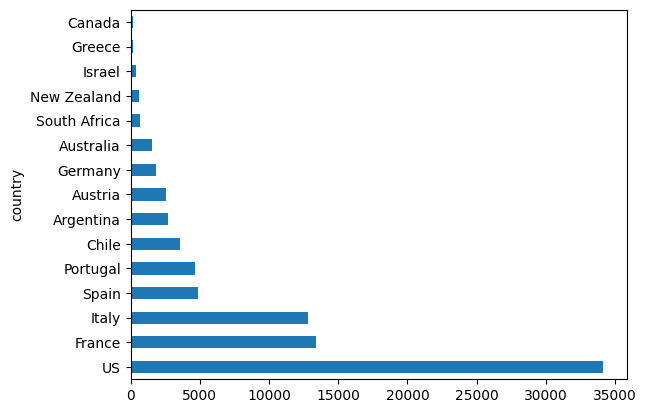

In [25]:
more_prov = data[data['province'].isin(subset_prov.index)].filter(['country', 'province'])
more_prov.groupby('country')['province'].count().sort_values(ascending=False).head(15).plot(kind='barh')

Provincias mas productoras de vino

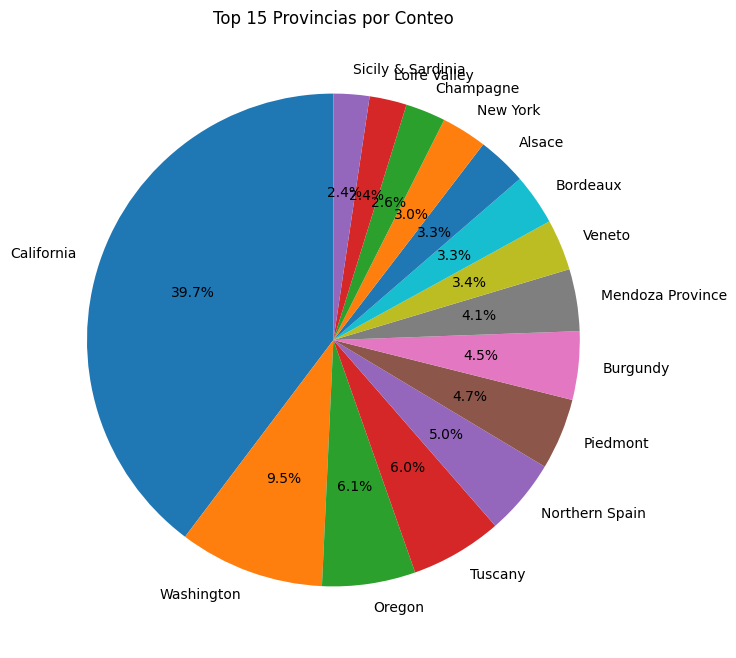

In [26]:
top_15 = subset_prov.sort_values(by='count', ascending=False).head(15)
# Crear el gráfico circular
top_15['count'].plot(kind='pie', labels=top_15.index, autopct='%1.1f%%', figsize=(10, 8), startangle=90)

# Personalizar el gráfico
plt.title('Top 15 Provincias por Conteo')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()

In [27]:
filtered_data = data[data['province'].isin(top_15.index)].filter(['country', 'province'])
filtered_data

,country,province
0,Italy,Sicily & Sardinia
4,US,Oregon
5,Spain,Northern Spain
6,Italy,Sicily & Sardinia
9,France,Alsace
...,...,...
129962,Italy,Sicily & Sardinia
129964,France,Alsace
129965,France,Alsace
129968,France,Alsace


Paises de las provincias mas productoras

<Axes: ylabel='province'>

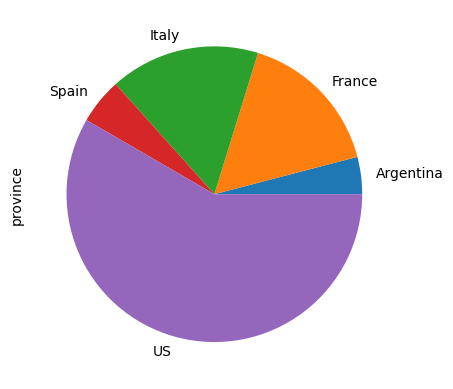

In [28]:
filtered_data.groupby('country')['province'].count().plot(kind='pie')

Points

Paises con mas puntos

In [29]:
data.groupby('country')['points'].mean().sort_values(ascending=False).head(15).round(2)

country
England         91.75
India           91.50
Austria         90.40
Germany         90.07
Hungary         89.48
Canada          89.33
France          89.17
US              89.01
China           89.00
Australia       88.97
New Zealand     88.90
Luxembourg      88.80
Italy           88.79
Morocco         88.69
South Africa    88.65
Name: points, dtype: float64

provincias con mas puntos

In [30]:
province_points = (data.groupby('province')['points'].mean().sort_values(ascending=False).round(2)).to_frame()
province_points.head(15)

,points
province,
Südburgenland,94.00
Cape South Coast,93.00
Leithaberg,92.33
Cape Peninsula,92.00
Mittelrhein,92.00
Madeira,92.00
Wachau,91.76
England,91.75
Kamptal,91.55


In [31]:
province_points = data.groupby('province')['points'].mean().sort_values(ascending=False).round(2).to_frame()

# Seleccionar las 15 provincias principales
top_15_provinces = province_points.head(15).index

# Filtrar el DataFrame original para incluir solo las provincias top 15
prov_country_points = data[data['province'].isin(top_15_provinces)]

# Seleccionar las columnas relevantes
prov_country_points = prov_country_points[['country', 'province', 'points']]

In [32]:
prov_country_points.groupby('country')['points'].mean()

country
Austria         91.641201
Chile           91.352941
England         91.746032
Germany         92.000000
India           91.500000
Portugal        92.000000
South Africa    91.500000
Name: points, dtype: float64

In [33]:
data.groupby('country')['points'].mean().sort_values(ascending=False)

country
England                   91.746032
India                     91.500000
Austria                   90.398916
Germany                   90.065512
Hungary                   89.477477
Canada                    89.329114
France                    89.171149
US                        89.006673
China                     89.000000
Australia                 88.970760
New Zealand               88.901454
Luxembourg                88.800000
Italy                     88.788248
Morocco                   88.692308
South Africa              88.651376
Turkey                    88.553571
Israel                    88.471178
Portugal                  88.320042
Slovenia                  88.235294
Czech Republic            88.000000
Serbia                    88.000000
Bulgaria                  87.784091
Lebanon                   87.758621
Switzerland               87.666667
Armenia                   87.500000
Spain                     87.419546
Georgia                   87.400000
Moldova             

price

Pais con los precios mas caros

<Axes: ylabel='country'>

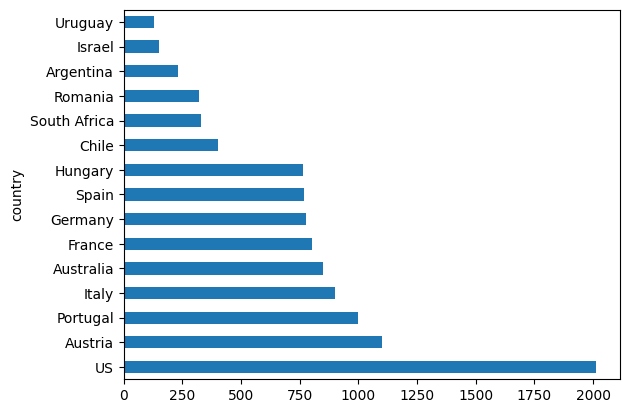

In [34]:
data.groupby('country')['price'].max().sort_values(ascending=False).head(15).plot(kind='barh')

Promedio de precios

<Axes: ylabel='country'>

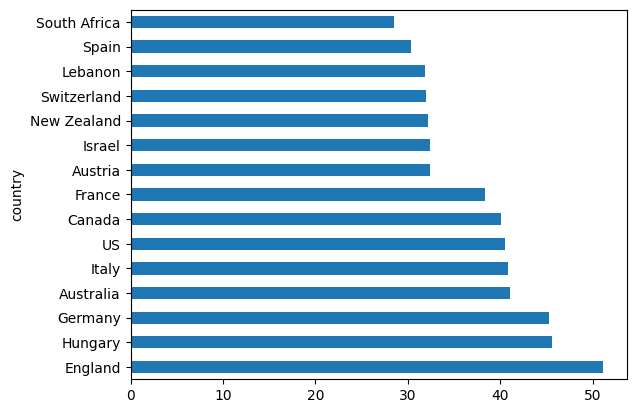

In [35]:
data.groupby('country')['price'].mean().sort_values(ascending=False).head(15).plot(kind='barh')

precios mas baratos

<Axes: ylabel='country'>

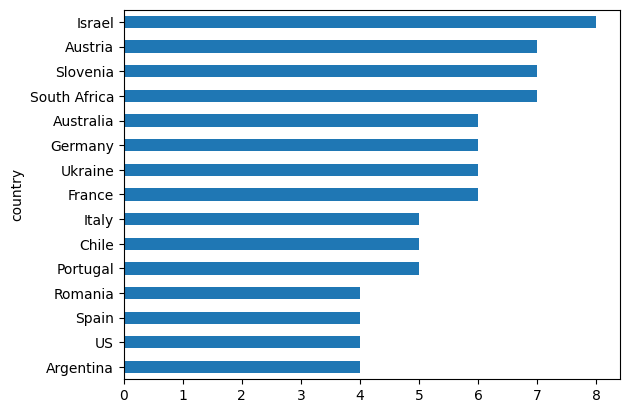

In [36]:
data.groupby('country')['price'].min().sort_values(ascending=True).head(15).plot(kind='barh')

Antiguedad

In [37]:
def extraer_anio(texto):
    # Buscar años en formato de cuatro dígitos (19xx o 20xx)
    match = re.search(r'\b(19|20)\d{2}\b', texto)
    if match:
        return match.group()
    
    # Buscar años en formato de "X Años" o "X Years Old"
    match = re.search(r'(\d+)\s*(Años|Years\s*Old)', texto, re.IGNORECASE)
    if match:
        return str(int(2024) - int(match.group(1)))  # Ajusta el año actual según tu necesidad
    
    return None

# Aplicar la función a cada fila
data['anio'] = data['title'].apply(extraer_anio)
data

,country,description,designation,points,price,province,region_1,title,variety,winery,continent,sentiment,anio
0,Italy,aroma include tropical fruit broom brimstone d...,Vulkà Bianco,87,28.0,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Europa,Positive,2013
1,Portugal,ripe fruity wine smooth structured firm tannin...,Avidagos,87,15.0,Douro,Unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europa,Positive,2011
3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,America del norte,Negative,2013
4,US,like regular bottling come rough tannic rustic...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,America del norte,Positive,2012
5,Spain,blackberry raspberry aroma typical navarran wh...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Europa,Positive,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129964,France,initially quite muted wine slowly develops imp...,Domaine Saint-Rémy Herrenweg,90,28.0,Alsace,Alsace,Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Ehrhart,Europa,Positive,2013
129965,France,rich beautiful dry wine offer considerable fre...,Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,Europa,Positive,2013
129966,Germany,note honeysuckle cantaloupe sweeten deliciousl...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Europa,Positive,2013
129968,France,welldrained gravel soil give wine crisp dry ch...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,Europa,Positive,2013


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85394 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      85394 non-null  object 
 1   description  85394 non-null  object 
 2   designation  85394 non-null  object 
 3   points       85394 non-null  int64  
 4   price        85394 non-null  float64
 5   province     85394 non-null  object 
 6   region_1     85394 non-null  object 
 7   title        85394 non-null  object 
 8   variety      85394 non-null  object 
 9   winery       85394 non-null  object 
 10  continent    85394 non-null  object 
 11  sentiment    85394 non-null  object 
 12  anio         81436 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 9.1+ MB


In [39]:
#data.loc[data.anio.isnull()].to_excel('Vinos_por_anio.xlsx')

In [40]:
data.anio.isnull().sum()

np.int64(3958)

In [41]:
anio_subset = data.anio.dropna().astype(int)
anio_subset.describe()

count    81436.000000
mean      2010.572695
std          3.935145
min       1874.000000
25%       2009.000000
50%       2011.000000
75%       2013.000000
max       2017.000000
Name: anio, dtype: float64

In [42]:
imputer = SimpleImputer(strategy='median')
data.loc[:, 'anio'] = imputer.fit_transform(data[['anio']])

In [43]:
data['anio'] = data['anio'].astype(int)

data["Antiguedad"] = 2024 - data.anio

In [44]:
data.Antiguedad.describe()

count    85394.000000
mean        13.407499
std          3.843915
min          7.000000
25%         11.000000
50%         13.000000
75%         15.000000
max        150.000000
Name: Antiguedad, dtype: float64

<Axes: ylabel='Frequency'>

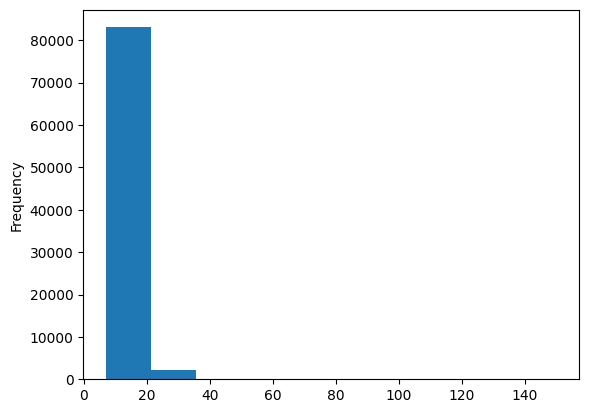

In [45]:
data.Antiguedad.plot(kind='hist')

variety

In [46]:
data.variety.value_counts()

variety
Pinot Noir                  9155
Chardonnay                  7263
Red Blend                   6874
Cabernet Sauvignon          5415
Riesling                    4041
                            ... 
Garnacha-Cariñena              1
Zlahtina                       1
Cabernet Franc-Lemberger       1
Mavrokalavryta                 1
Bobal-Cabernet Sauvignon       1
Name: count, Length: 641, dtype: int64

Variedades con mejores puntos

In [47]:
variety_points = data.groupby('variety')['points'].mean().sort_values(ascending=False).round(2).head(15)

In [48]:
variety_points

variety
Cabernet-Shiraz        96.00
Tinta del Pais         95.00
Gelber Traminer        95.00
Syrah-Petit Verdot     94.00
Sercial                94.00
Riesling-Chardonnay    94.00
Muscadelle             93.25
Bual                   93.20
Garnacha-Cariñena      93.00
Ramisco                93.00
Rosenmuskateller       92.50
Roviello               92.50
Picolit                92.12
Caprettone             92.00
Torontel               92.00
Name: points, dtype: float64

In [49]:
variety_points_data = data[data['variety'].isin(variety_points.index)].filter(['country', 'points', 'price', 'variety', 'Antiguedad'])
variety_points_data.head()

,country,points,price,variety,Antiguedad
346,Australia,98,350.0,Muscadelle,13
11442,France,91,27.0,Muscadelle,11
15547,Australia,94,140.0,Muscadelle,13
15613,Italy,95,100.0,Picolit,20
16315,Spain,94,45.0,Tinta del Pais,14


Que paises producen las mejores variedades?

<Axes: ylabel='country'>

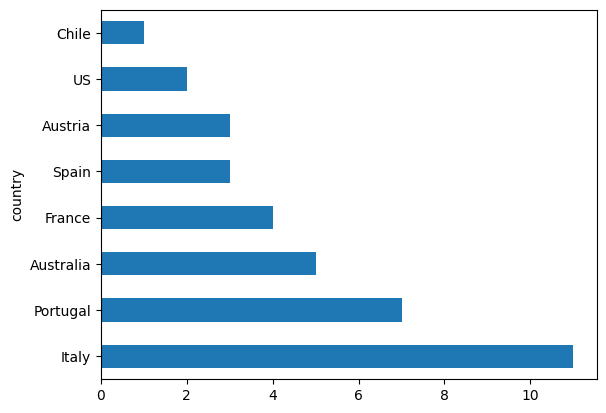

In [50]:
variety_points_data.groupby('country')['variety'].count().sort_values(ascending=False).plot(kind='barh')

Cual es el precio de las mejores variedades?

<Axes: ylabel='variety'>

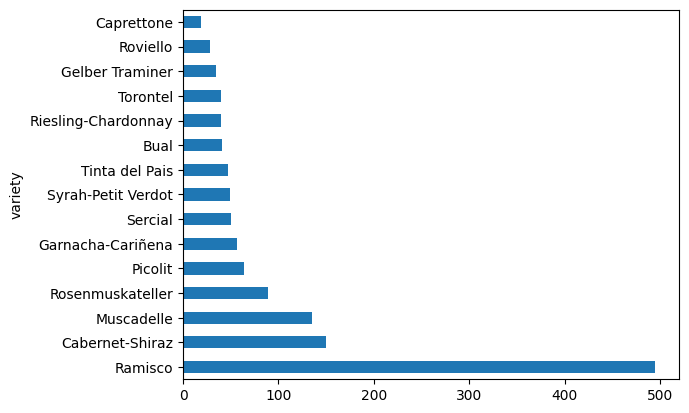

In [51]:
variety_points_data.groupby('variety')['price'].mean().sort_values(ascending=False).plot(kind='barh')

Cual es la antiguedad de estas variedades?

<Axes: ylabel='variety'>

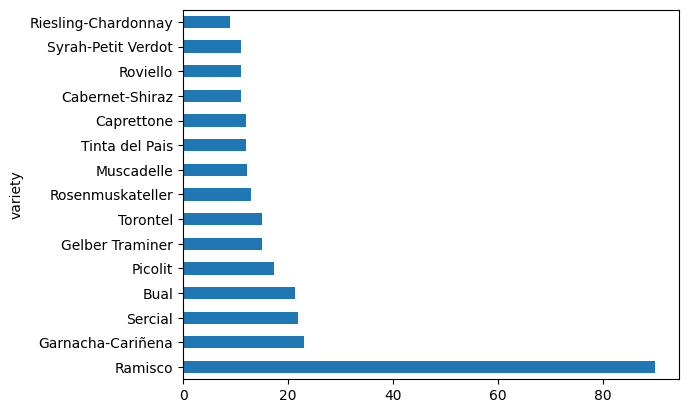

In [52]:
variety_points_data.groupby('variety')['Antiguedad'].mean().sort_values(ascending=False).plot(kind='barh')

Se puede ver que dentro de los vinos mejores clasificados. Ramisco es el mas caro y con mas antifguedad. Que pais lo produce?

In [53]:
data.loc[data.variety == 'Ramisco']

,country,description,designation,points,price,province,region_1,title,variety,winery,continent,sentiment,anio,Antiguedad
107854,Portugal,rare survival come ramisco grape planted roots...,Reserva Velho,93,495.0,Colares,Unknown,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,Europa,Positive,1934,90


Si quisiera saber donde puedo comprar el mejor vino, con el precio mas barato posible. Donde seria? 

In [54]:
data['ratio_puntos_precio'] = data['points'] / data['price']
mejor_relacion = data.sort_values(by='ratio_puntos_precio', ascending=False)
mejores_vinos = mejor_relacion.head(10)
mejores_vinos

,country,description,designation,points,price,province,region_1,title,variety,winery,continent,sentiment,anio,Antiguedad,ratio_puntos_precio
126096,Romania,note sundried hay green flower highlight nose ...,UnWineD,86,4.0,Viile Timisului,Unknown,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,Cramele Recas,Europa,Positive,2011,13,21.50
1987,Spain,berry cherry aroma surprisingly sturdy clean f...,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,Europa,Positive,2013,11,21.25
112919,Spain,nice nose leafy note mellow redberry aroma bou...,Estate Bottled,84,4.0,Levante,Yecla,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,Europa,Positive,2010,14,21.00
29553,Argentina,crimson color translucent candied slightly gre...,Red,84,4.0,Mendoza Province,Mendoza,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,America del sur,Positive,2009,15,21.00
59507,US,sweet fruity canned wine feel soft syrupy suga...,Unoaked,83,4.0,California,California,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,America del norte,Positive,2011,13,20.75
117303,Spain,tropical fruit citrus aroma arent bad palate h...,Flirty Bird,82,4.0,Central Spain,Vino de la Tierra de Castilla,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis,Europa,Negative,2012,12,20.50
104412,US,sparkling wine best mancans new canned offerin...,Fizz,87,5.0,California,California,Mancan NV Fizz Sparkling (California),Sparkling Blend,Mancan,America del norte,Positive,2011,13,17.40
24592,Chile,decent good sb bell whistle lot straightahead ...,Reserva,87,5.0,Aconcagua Valley,Unknown,In Situ 2008 Reserva Sauvignon Blanc (Aconcagu...,Sauvignon Blanc,In Situ,America del sur,Positive,2008,16,17.40
3167,Italy,packaged pocketfriendly ml bottle fragrant sim...,Mini,86,5.0,Veneto,Prosecco,Anna Spinato NV Mini (Prosecco),Glera,Anna Spinato,Europa,Positive,2011,13,17.20
22200,US,nice everyday wine bone dry savory acidity sho...,Twin Valley,85,5.0,California,California,Gallo Family Vineyards NV Twin Valley Pinot Gr...,Pinot Grigio,Gallo Family Vineyards,America del norte,Positive,2011,13,17.00


In [57]:
mejores_vinos.groupby('country')['ratio_puntos_precio'].max().sort_values(ascending=False)

country
Romania      21.50
Spain        21.25
Argentina    21.00
US           20.75
Chile        17.40
Italy        17.20
Name: ratio_puntos_precio, dtype: float64

In [60]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'title', 'variety', 'winery', 'continent', 'sentiment',
       'anio', 'Antiguedad', 'ratio_puntos_precio'],
      dtype='object')

data

In [61]:
data

,country,description,designation,points,price,province,region_1,title,variety,winery,continent,sentiment,anio,Antiguedad,ratio_puntos_precio
0,Italy,aroma include tropical fruit broom brimstone d...,Vulkà Bianco,87,28.0,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Europa,Positive,2013,11,3.107143
1,Portugal,ripe fruity wine smooth structured firm tannin...,Avidagos,87,15.0,Douro,Unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europa,Positive,2011,13,5.800000
3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,America del norte,Negative,2013,11,6.692308
4,US,like regular bottling come rough tannic rustic...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,America del norte,Positive,2012,12,1.338462
5,Spain,blackberry raspberry aroma typical navarran wh...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Europa,Positive,2011,13,5.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129964,France,initially quite muted wine slowly develops imp...,Domaine Saint-Rémy Herrenweg,90,28.0,Alsace,Alsace,Domaine Ehrhart 2013 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Ehrhart,Europa,Positive,2013,11,3.214286
129965,France,rich beautiful dry wine offer considerable fre...,Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,Europa,Positive,2013,11,3.214286
129966,Germany,note honeysuckle cantaloupe sweeten deliciousl...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Europa,Positive,2013,11,3.214286
129968,France,welldrained gravel soil give wine crisp dry ch...,Kritt,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,Europa,Positive,2013,11,3.000000
